In [89]:
import polars as pl
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

In [3]:
TRAIN_FILE_PATH = Path.cwd() / "data" / "train.csv"
assert TRAIN_FILE_PATH.exists()
assert TRAIN_FILE_PATH.is_file()

In [12]:
df = pl.read_csv(TRAIN_FILE_PATH)
df


id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
i64,str,f64,i64,i64,str,str,str,f64,f64,str,i64
0,"""Male""",28.0,0,0,"""Yes""","""Private""","""Urban""",79.53,31.1,"""never smoked""",0
1,"""Male""",33.0,0,0,"""Yes""","""Private""","""Rural""",78.44,23.9,"""formerly smoke...",0
2,"""Female""",42.0,0,0,"""Yes""","""Private""","""Rural""",103.0,40.3,"""Unknown""",0
3,"""Male""",56.0,0,0,"""Yes""","""Private""","""Urban""",64.87,28.8,"""never smoked""",0
4,"""Female""",24.0,0,0,"""No""","""Private""","""Rural""",73.36,28.8,"""never smoked""",0
5,"""Female""",34.0,0,0,"""Yes""","""Private""","""Urban""",84.35,22.2,"""Unknown""",0
6,"""Female""",53.0,0,0,"""Yes""","""Private""","""Rural""",88.97,25.3,"""never smoked""",0
7,"""Male""",78.0,0,1,"""Yes""","""Self-employed""","""Rural""",75.32,24.8,"""Unknown""",0
8,"""Female""",45.0,0,0,"""Yes""","""Private""","""Rural""",107.22,34.1,"""never smoked""",0


In [13]:
df.null_count()

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
def plot_counts(column_name: str) -> None:
    grouped_df = df.groupby(column_name).agg(pl.count()).sort("count", reverse=True)
    indices = np.arange(len(grouped_df))
    bars = plt.barh(indices, grouped_df['count'])
    plt.yticks(indices, grouped_df[column_name])
    plt.bar_label(bars, fmt='%d')
    plt.title(f"Counts for {column_name}")


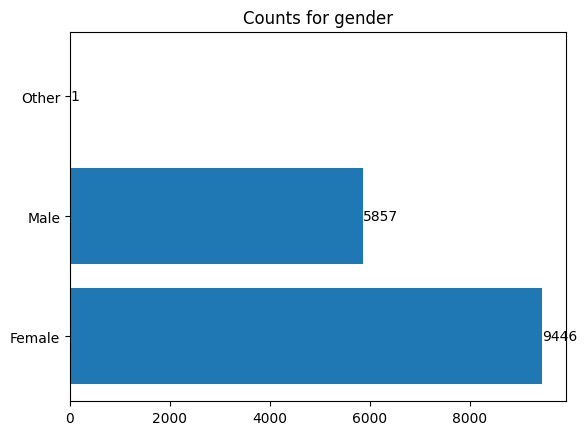

In [32]:
plot_counts('gender')

In [65]:
def plot_histogram(column_name: str, bins: int = 10) -> pl.DataFrame:
    _ = plt.hist(df[column_name], bins=bins)
    _ = plt.title(f'{column_name} distribution')
    

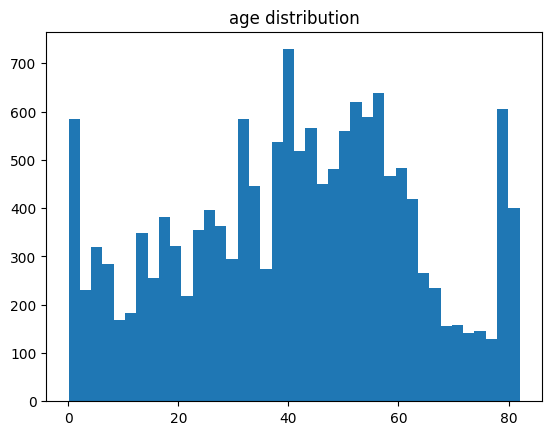

In [67]:
plot_histogram('age', bins=40)

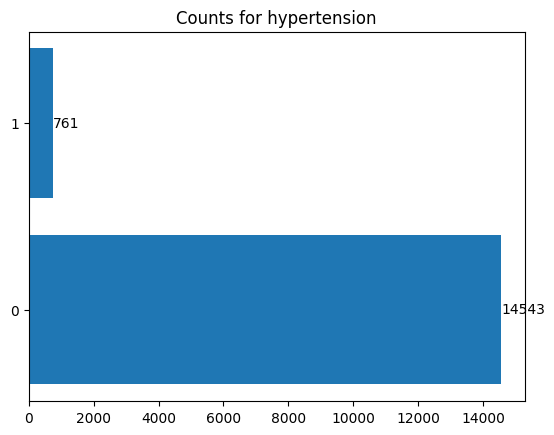

In [68]:
plot_counts('hypertension')

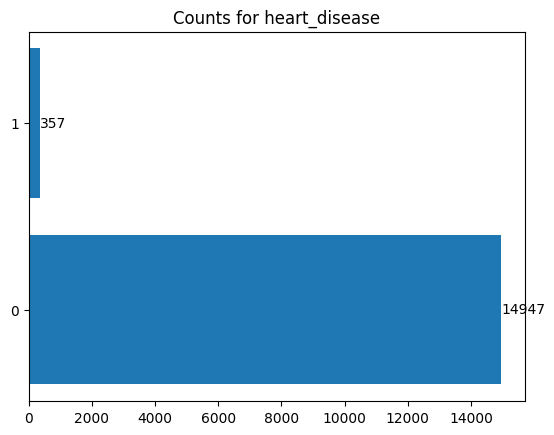

In [69]:
plot_counts('heart_disease')

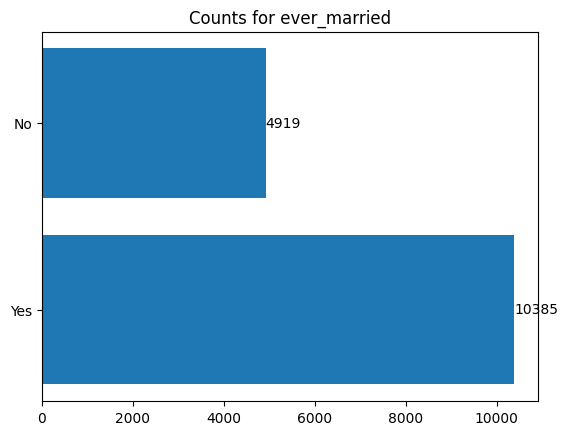

In [70]:
plot_counts('ever_married')

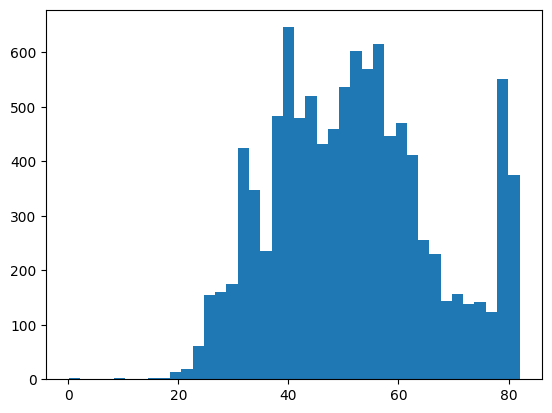

In [73]:
_ = plt.hist(df.filter(pl.col('ever_married') == 'Yes').select(pl.col('age')), bins=40)

There are some kids marked as married

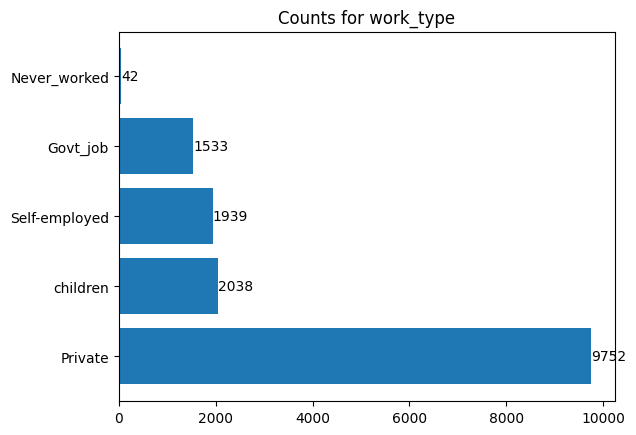

In [75]:
plot_counts('work_type')

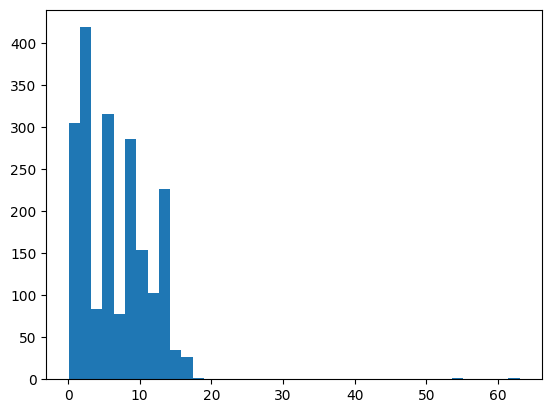

In [78]:
_ = plt.hist(df.filter(pl.col('work_type') == 'children').select(pl.col('age')), bins=40)

There are some old people incorrectly assigned to work type.

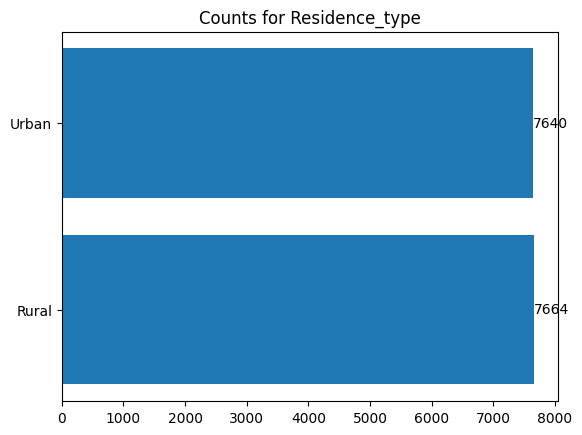

In [80]:
plot_counts('Residence_type')

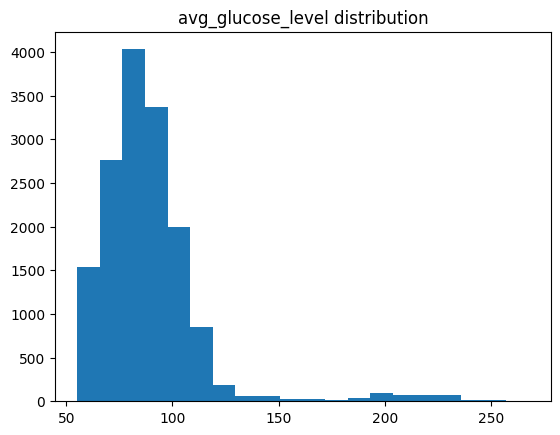

In [82]:
plot_histogram('avg_glucose_level', bins=20)

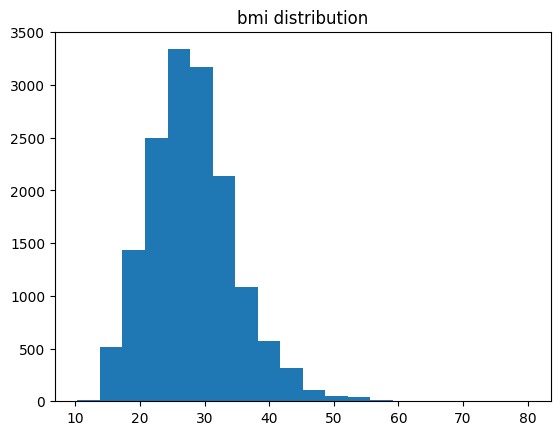

In [83]:
plot_histogram('bmi', bins=20)

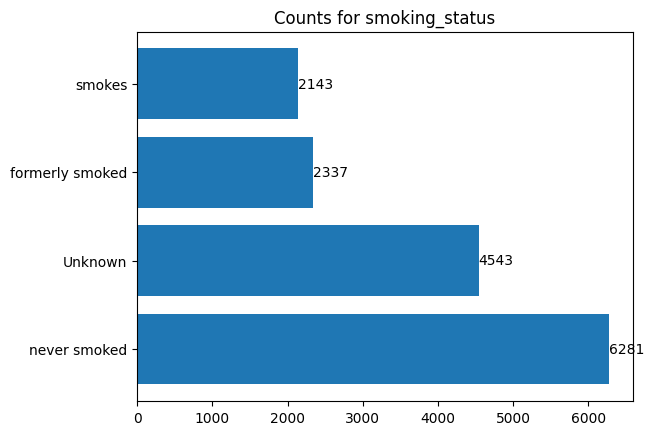

In [84]:
plot_counts('smoking_status')

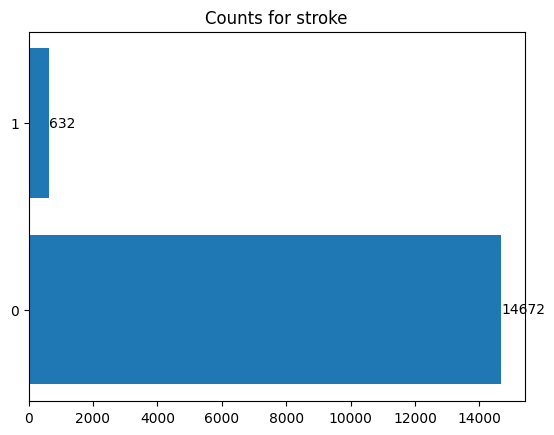

In [85]:
plot_counts('stroke')